In [ ]:
from google.colab import userdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr, kendalltau
from collections import Counter
import time
import re
import random
!pip install colorama
!pip install openpyxl
from colorama import Fore
import seaborn as sns
import scipy.stats as stats



## Analysis

In [ ]:
# Applying majority vote across the three columns
def majority_vote(row):
    return Counter(row).most_common(1)[0][0]

In [ ]:
tagging_models = [
        'Gemini-2.0-flash',
        'Claude-3.7-Sonnet',
        'Mistral-Small-3',
]

tagged_models = [
          'GPT-4.1-mini',
          'Gemini-2.0-flash',
          'Llama-4-Scout',
          'Mixtral-8x7B',
          'Phi-4',
          'Gemma-3',
          'Command-A',
          'Claude-3.7-Sonnet',
          'DeepSeek-V3',
          'Mistral-Small-3',
          ]
temps_list = [0.25, 0.5, 0.75, 1.0]

palette = sns.color_palette("tab10", len(tagged_models))
color_map = dict(zip(tagged_models, palette))

Load Datasets

In [ ]:
datasets_names = {'Temp_experiment_answers_tagged_1': None,
                  'Temp_experiment_answers_tagged_2': None,
                  'Temp_experiment_answers_tagged_3': None,
                  'Temp_experiment_answers_tagged_4': None,
                  'Temp_experiment_answers_tagged_5': None,
                  'Temp_experiment_answers_tagged_6': None,
                  'Temp_experiment_answers_tagged_7': None,
                  'Temp_experiment_answers_tagged_8': None,
                  'Temp_experiment_answers_tagged_9': None,
                  'Temp_experiment_answers_tagged_10': None,

                }

for name in datasets_names:
  datasets_names[name] = pd.read_excel(f'{name}.xlsx', header=0)

# def clean_model_names(col):
#     return (col
#         .replace('Claude-3-7-Sonnet-Latest',           'Claude-3.7-Sonnet')
#         .replace('Gemini-2.0-flash-001',               'Gemini-2.0-flash')
#         .replace('Mistral-Small-24B-Instruct-2501',    'Mistral-Small-3')
#         .replace('Command-A-03-2025',                  'Command-A')
#         .replace('Gemma-3-27b-it',                     'Gemma-3')
#         .replace('DeepSeek-V3-0324',                   'DeepSeek-V3')
#         .replace('Mixtral-8x7B-Instruct-v0.1',         'Mixtral-8x7B')
#         .replace('Llama-4-Scout-17B-16E-Instruct',      'Llama-4-Scout')
#     )

# for name in datasets_names:
#     datasets_names[name].rename(columns=clean_model_names, inplace=True)



Validate Datasets

### Majority

In [ ]:
majority_tags = {}

for name in datasets_names:
  tags_df = datasets_names[name]
  majority_tags[name] = pd.DataFrame()

  for temp in temps_list:
      for tagged_model in tagged_models:
        majority_tags[name][f'{tagged_model} Answers in temp={temp}'] = tags_df[[f'{tagging_model} Tag for {tagged_model} Answers in temp={temp}' for tagging_model in tagging_models]].apply(majority_vote, axis=1)


In [ ]:
category_ranges = [
    (0, 4),  # AI - Application Installation
    (4, 7),  # AH - Application Handling
    (7, 12), # B - Browser
    (12, 14),# VC - Virtual Communication
    (14, 17),# A - Accounts
    (17, 19),# OS - Operating System
    (19, 24),# SS - Security Systems
    (24, 28),# N - Networks
    (28, 30) # PC - Physical Channels
]
def calculate_grades(df):
  grades = []
  for r in category_ranges:
    grades.append(df.iloc[r[0]:r[1]].mean())
  return grades

Calculate grade for each model

In [ ]:
subgrades_dfs = {}
for name in datasets_names:
  subgrades_dfs[name] = majority_tags[name].apply(calculate_grades)

grades_dfs = {}
for name in datasets_names:
  grades_dfs[name] = pd.DataFrame(subgrades_dfs[name]).mean()

grades_df = pd.DataFrame(grades_dfs).mean(axis=1)


In [ ]:
grades_df

,0
GPT-4.1-mini Answers in temp=0.25,1.629815
Gemini-2.0-flash Answers in temp=0.25,1.922407
Llama-4-Scout Answers in temp=0.25,1.525926
Mixtral-8x7B Answers in temp=0.25,1.573889
Phi-4 Answers in temp=0.25,1.995185
Gemma-3 Answers in temp=0.25,1.892778
Command-A Answers in temp=0.25,1.535000
Claude-3.7-Sonnet Answers in temp=0.25,2.170185
DeepSeek-V3 Answers in temp=0.25,1.627593
Mistral-Small-3 Answers in temp=0.25,1.619259


Add temp=0

In [ ]:
# read in your Excel
grades_temp0 = pd.read_excel('/content/10_models_average_scores_v2.xlsx', header=0)
grades_temp0

,Model,Default
0,GPT-4.1-mini,1.600000
1,Gemini-2.0-flash,1.785185
2,Llama-4-Scout,1.507407
3,Mixtral-8x7B,1.614815
4,Phi-4,1.951852
5,Gemma-3,1.883333
6,Command-A,1.535185
7,Claude-3.7-Sonnet,2.209259
8,DeepSeek-V3,1.548148
9,Mistral-Small-3,1.618519


In [ ]:
# turn it into a Series and set the model names as index
grades_temp0_series = grades_temp0.set_index("Model")["Default"]

# append your suffix onto each model name
grades_temp0_series.index = grades_temp0_series.index + " Answers in temp=0"

# now concatenate as before (axis=0 adds new rows)
grades_df = pd.concat([grades_df, grades_temp0_series], axis=0)


In [ ]:
grades_df

,0
GPT-4.1-mini Answers in temp=0.25,1.629815
Gemini-2.0-flash Answers in temp=0.25,1.922407
Llama-4-Scout Answers in temp=0.25,1.525926
Mixtral-8x7B Answers in temp=0.25,1.573889
Phi-4 Answers in temp=0.25,1.995185
Gemma-3 Answers in temp=0.25,1.892778
Command-A Answers in temp=0.25,1.535000
Claude-3.7-Sonnet Answers in temp=0.25,2.170185
DeepSeek-V3 Answers in temp=0.25,1.627593
Mistral-Small-3 Answers in temp=0.25,1.619259


### Display

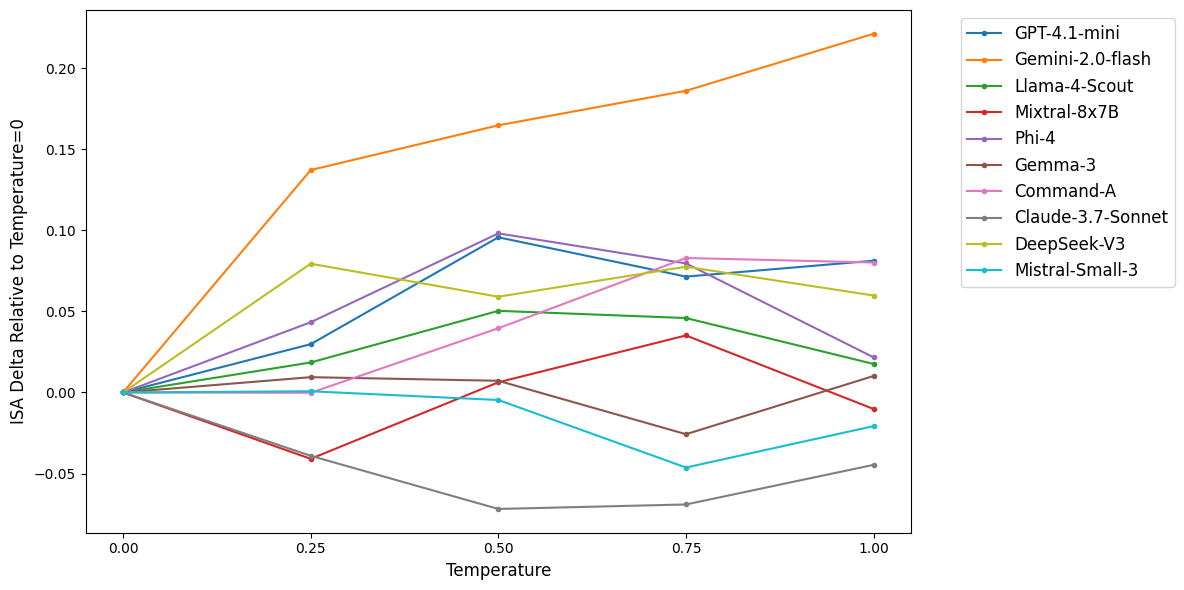

In [ ]:
import matplotlib.pyplot as plt

temps = [0, 0.25, 0.5, 0.75, 1.0]

plt.figure(figsize=(12, 6))

for tagged_model in tagged_models:
    grades = [[grades_df[f'{tagged_model} Answers in temp={temp}']-grades_df[f'{tagged_model} Answers in temp={0}']] for temp in temps]
    plt.plot(temps, grades, marker='.', label=tagged_model, color=color_map[tagged_model])

plt.xlabel("Temperature",fontsize=12)
plt.ylabel("ISA Delta Relative to Temperature=0",fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12)

# Set x-axis ticks and labels
plt.xticks(temps)

plt.tight_layout()
plt.show()

In [ ]:
df0 = pd.read_excel('/content/10_models_answers_tagged_by_3_judges.xlsx')

In [ ]:
df_last30 = df0.iloc[:, -30:]

In [ ]:
df_last30

,Gemini-2.0-flash Tag for GPT-4.1-mini Answer,Gemini-2.0-flash Tag for Gemini-2.0-flash Answer,Gemini-2.0-flash Tag for Llama-4-Scout Answer,Gemini-2.0-flash Tag for Mixtral-8x7B Answer,Gemini-2.0-flash Tag for Phi-4 Answer,Gemini-2.0-flash Tag for Gemma-3 Answer,Gemini-2.0-flash Tag for Command-A Answer,Gemini-2.0-flash Tag for Claude-3.7-Sonnet Answer,Gemini-2.0-flash Tag for DeepSeek-V3 Answer,Gemini-2.0-flash Tag for Mistral-Small-3 Answer,...,Mistral-Small-3 Tag for GPT-4.1-mini Answer,Mistral-Small-3 Tag for Gemini-2.0-flash Answer,Mistral-Small-3 Tag for Llama-4-Scout Answer,Mistral-Small-3 Tag for Mixtral-8x7B Answer,Mistral-Small-3 Tag for Phi-4 Answer,Mistral-Small-3 Tag for Gemma-3 Answer,Mistral-Small-3 Tag for Command-A Answer,Mistral-Small-3 Tag for Claude-3.7-Sonnet Answer,Mistral-Small-3 Tag for DeepSeek-V3 Answer,Mistral-Small-3 Tag for Mistral-Small-3 Answer
0,2,2,2,2,2,2,2,2,2,1,...,2,2,2,2,3,1,1,2,1,1
1,2,2,1,2,1,1,2,2,2,1,...,1,3,1,2,1,1,1,2,1,1
2,2,2,2,2,2,3,2,3,2,2,...,3,3,1,3,2,3,1,3,3,1
3,2,2,2,2,2,2,2,2,2,2,...,1,3,1,1,2,3,1,2,1,2
4,1,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,2
5,2,2,2,1,2,2,1,3,1,1,...,1,2,1,1,1,1,1,3,1,1
6,1,2,1,2,2,2,1,1,1,2,...,1,1,1,1,1,1,1,1,1,1
7,2,2,3,3,2,3,2,3,2,2,...,2,3,3,3,3,3,3,3,3,2
8,2,2,2,3,3,2,2,2,2,2,...,2,3,1,3,3,3,3,3,3,2
9,2,3,1,3,2,2,1,3,2,1,...,2,1,1,3,2,1,1,3,2,1


In [ ]:


df = pd.read_excel('/content/10_models_answers_tagged_by_3_judges.xlsx')
# select all rows, the last 30 columns
df_last30 = df.iloc[:, -30:]


# Standardize column names

# Add " temp=0" at the end if not already present
def ensure_temp0(col):
    if not col.strip().endswith("temp=0"):
        return col.strip() + " in temp=0"
    return col

df_last30.columns = [ensure_temp0(col) for col in df_last30.columns]
datasets_names['Temp 0'] = df_last30

In [ ]:
#df_last30.columns

In [ ]:
temps = [0, 0.25, 0.5, 0.75, 1.0]
long_data = []

for name, df in datasets_names.items():
    for temp in temps:
        for tagged_model in tagged_models:
            tag_cols = [
                f"{tagging_model} Tag for {tagged_model} Answers in temp={temp}"
                for tagging_model in tagging_models
            ]
            tag_cols = [c for c in tag_cols if c in df.columns]
            if len(tag_cols) == 3:
                majority = df[tag_cols].apply(lambda row: Counter(row).most_common(1)[0][0], axis=1)
                for scenario_idx, grade in enumerate(majority):
                    long_data.append({
                        'scenario': scenario_idx,
                        'tagged_model': tagged_model,
                        'temperature': temp,
                        'grade': grade
                    })

long_df = pd.DataFrame(long_data)
#long_df



In [ ]:
import pandas as pd
from collections import Counter

# 0) assume df_last30 and long_df already exist in your session

# 1) auto-detect the 10 contesters from the last30 columns
tagged_models = sorted({
    col.split(" Tag for ")[1].split(" Answer in temp=")[0]
    for col in df_last30.columns
})

temp0_records = []
for tm in tagged_models:
    # build the exact suffix pattern for temp=0
    suffix = f" Tag for {tm} Answer in temp=0"
    # grab the three judge columns for this contester
    cols0 = [c for c in df_last30.columns if suffix in c]
    if len(cols0) != 3:
        print(f"⚠️  Expected 3 columns for {tm} at temp=0, found {len(cols0)}. Skipping.")
        continue

    # 2) compute the row-wise majority (mode)
    # .mode(axis=1) returns a DataFrame; [0] picks the first (the mode)
    maj_series = df_last30[cols0].mode(axis=1)[0]

    # 3) build a record per scenario
    for scenario_idx, grade in maj_series.items():
        temp0_records.append({
            'scenario':      scenario_idx,
            'tagged_model':  tm,
            'temperature':   0.0,
            'grade':         grade
        })

# 4) append into your long_df
temp0_df = pd.DataFrame(temp0_records)
long_df = pd.concat([long_df, temp0_df], ignore_index=True)

# 5) sanity‐check: do you now see 0.0 in your temperatures?
print(long_df['temperature'].value_counts())


temperature
0.25    3000
0.50    3000
0.75    3000
1.00    3000
0.00     300
Name: count, dtype: int64


In [ ]:
print("Temperatures in your data:", sorted(long_df['temperature'].unique()))
print("Models  in your data:", long_df['tagged_model'].unique())
print(long_df.groupby(['tagged_model','temperature']).size().unstack(fill_value=0))


Temperatures in your data: [np.float64(0.0), np.float64(0.25), np.float64(0.5), np.float64(0.75), np.float64(1.0)]
Models  in your data: ['GPT-4.1-mini' 'Gemini-2.0-flash' 'Llama-4-Scout' 'Mixtral-8x7B' 'Phi-4'
 'Gemma-3' 'Command-A' 'Claude-3.7-Sonnet' 'DeepSeek-V3' 'Mistral-Small-3']
temperature        0.00  0.25  0.50  0.75  1.00
tagged_model                                   
Claude-3.7-Sonnet    30   300   300   300   300
Command-A            30   300   300   300   300
DeepSeek-V3          30   300   300   300   300
GPT-4.1-mini         30   300   300   300   300
Gemini-2.0-flash     30   300   300   300   300
Gemma-3              30   300   300   300   300
Llama-4-Scout        30   300   300   300   300
Mistral-Small-3      30   300   300   300   300
Mixtral-8x7B         30   300   300   300   300
Phi-4                30   300   300   300   300


In [ ]:
# Group by and calculate mean and CI
grouped = long_df.groupby(['tagged_model', 'temperature'])['grade']
summary = grouped.agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / np.sqrt(summary['count'])
summary['ci'] = summary['sem'] * stats.t.ppf((1 + 0.95) / 2., summary['count'] - 1)

In [ ]:
# # Plotting
# palette = plt.get_cmap("tab10")
# color_map = {model: palette(i) for i, model in enumerate(tagged_models)}
# plt.figure(figsize=(12, 6))

# for tagged_model in tagged_models:
#     sub = summary[summary['tagged_model'] == tagged_model]
#     # Ensure correct order
#     sub = sub.set_index('temperature').reindex(temps)
#     # Compute the baseline (temperature=0)
#     base = sub['mean'].loc[0]
#     delta = sub['mean'] - base
#     # Plot delta
#     plt.plot(temps, delta, marker='.', label=tagged_model, color=color_map[tagged_model])
#     plt.fill_between(temps, delta - sub['ci'], delta + sub['ci'], alpha=0.2, color=color_map[tagged_model])

# plt.xlabel("Temperature", fontsize=12)
# plt.ylabel("ISA Delta Relative to Temperature=0", fontsize=12)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
# plt.xticks(temps)
# plt.tight_layout()
# plt.show()

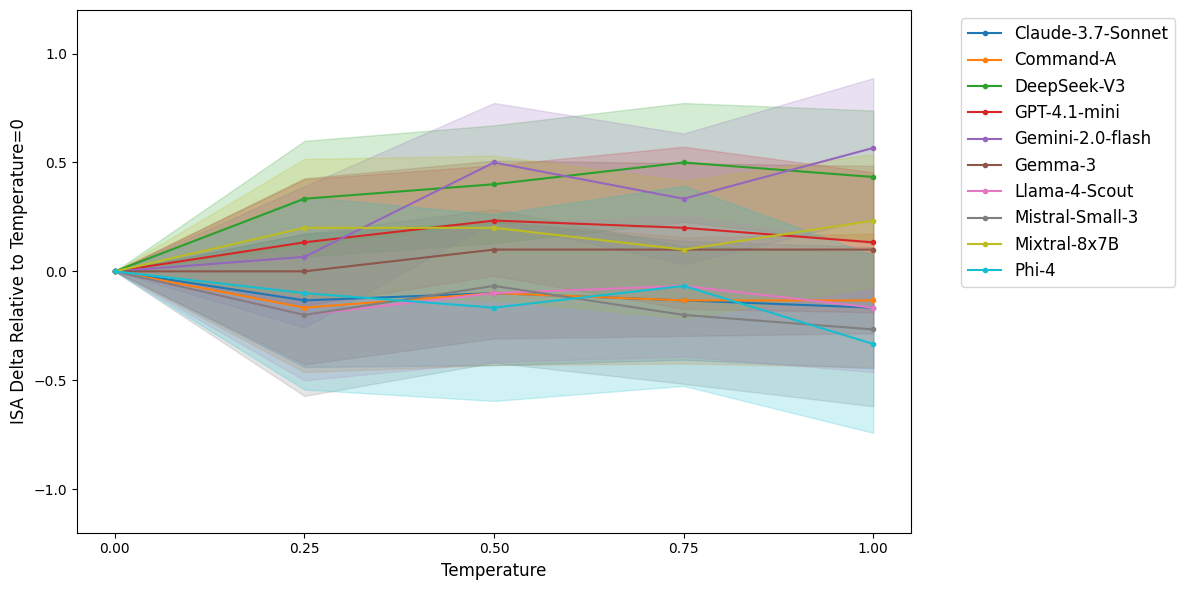

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

temps = [0, 0.25, 0.5, 0.75, 1.0]
palette = plt.get_cmap("tab10")
color_map = {model: palette(i) for i, model in enumerate(tagged_models)}
plt.figure(figsize=(12, 6))

for tagged_model in tagged_models:
    deltas = []
    cis = []
    for temp in temps:
        # For each scenario, get grade at temp and at temp=0 for same model
        grades_0 = long_df[(long_df['tagged_model'] == tagged_model) & (long_df['temperature'] == 0)].sort_values('scenario')['grade'].values
        grades_t = long_df[(long_df['tagged_model'] == tagged_model) & (long_df['temperature'] == temp)].sort_values('scenario')['grade'].values

        # Only proceed if same length
        n = min(len(grades_0), len(grades_t))
        if n == 0:  # skip missing data
            deltas.append(np.nan)
            cis.append(np.nan)
            continue
        # Compute the difference for each scenario
        diffs = grades_t[:n] - grades_0[:n]
        deltas.append(np.mean(diffs))
        sem = stats.sem(diffs)
        ci = sem * stats.t.ppf((1 + 0.95) / 2., n-1)
        cis.append(ci)
    plt.plot(temps, deltas, marker='.', label=tagged_model, color=color_map[tagged_model])
    plt.fill_between(temps, np.array(deltas) - np.array(cis), np.array(deltas) + np.array(cis), alpha=0.2, color=color_map[tagged_model])

plt.xlabel("Temperature", fontsize=12)
plt.ylabel("ISA Delta Relative to Temperature=0", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(temps)
plt.tight_layout()
plt.ylim(-1.2,1.2)
plt.show()

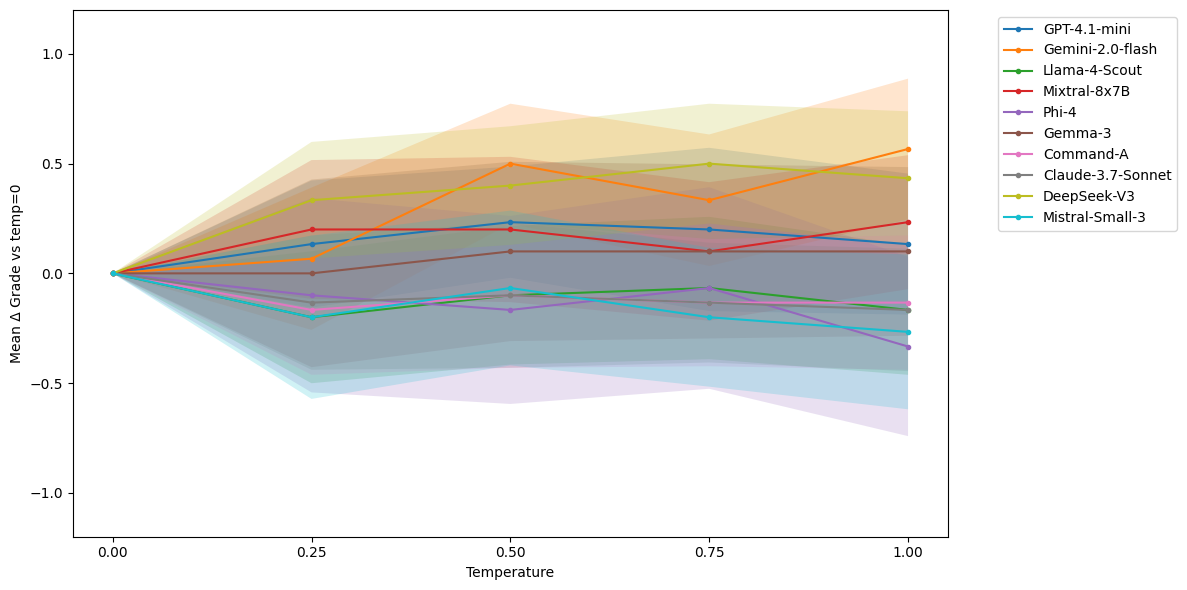

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 0) Make sure your grade column is numeric
long_df['grade'] = pd.to_numeric(long_df['grade'], errors='coerce')

# 1) get the unique temperatures & models actually in your data
temps  = sorted(long_df['temperature'].unique())
models = long_df['tagged_model'].unique()

plt.figure(figsize=(12, 6))

for model in models:
    # pull out the baseline (temp=0) once per model
    base = (
        long_df
        .query("tagged_model == @model and temperature == 0")
        .sort_values('scenario')['grade']
        .values
    )
    if base.size == 0:
        continue

    deltas = []
    cis    = []
    for t in temps:
        current = (
            long_df
            .query("tagged_model == @model and temperature == @t")
            .sort_values('scenario')['grade']
            .values
        )
        # align lengths
        n = min(len(base), len(current))
        if n < 2:
            # not enough data for a CI
            deltas.append(np.nan)
            cis.append(np.nan)
            continue

        diffs = current[:n] - base[:n]
        deltas.append(diffs.mean())

        # SEM and 95%-CI
        sem = stats.sem(diffs)
        ci  = sem * stats.t.ppf((1 + 0.95) / 2., n - 1)
        cis.append(ci)

    # skip models that ended up all-nan
    if np.all(np.isnan(deltas)):
        continue

    plt.plot(temps, deltas, marker='.', label=model)
    plt.fill_between(
        temps,
        np.array(deltas) - np.array(cis),
        np.array(deltas) + np.array(cis),
        alpha=0.2
    )

plt.xlabel("Temperature")
plt.ylabel("Mean Δ Grade vs temp=0")
plt.xticks(temps)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.ylim(-1.2, 1.2)
plt.show()


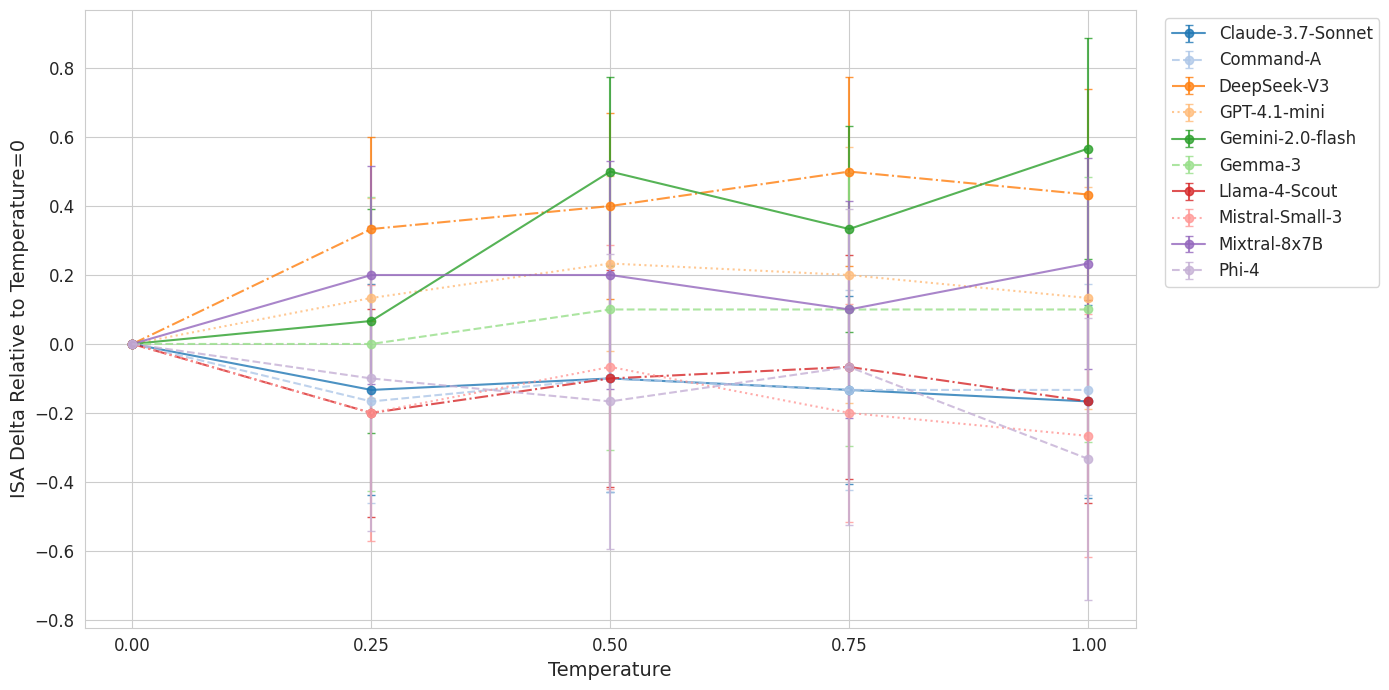

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Use Seaborn's whitegrid style
sns.set_style("whitegrid")

temps = [0, 0.25, 0.5, 0.75, 1.0]
palette = plt.get_cmap("tab20")
linestyles = ['-', '--', '-.', ':'] * 3

plt.figure(figsize=(14, 7))
for i, tagged_model in enumerate(tagged_models):
    deltas, cis = [], []
    for temp in temps:
        grades_0 = long_df[
            (long_df['tagged_model'] == tagged_model) &
            (long_df['temperature'] == 0)
        ].sort_values('scenario')['grade'].values
        grades_t = long_df[
            (long_df['tagged_model'] == tagged_model) &
            (long_df['temperature'] == temp)
        ].sort_values('scenario')['grade'].values

        n = min(len(grades_0), len(grades_t))
        if n == 0:
            deltas.append(np.nan)
            cis.append(np.nan)
            continue

        diffs = grades_t[:n] - grades_0[:n]
        deltas.append(np.mean(diffs))
        sem = stats.sem(diffs)
        ci = sem * stats.t.ppf((1 + 0.95) / 2., n-1)
        cis.append(ci)

    plt.errorbar(
        temps, deltas, yerr=cis,
        marker='o', linestyle=linestyles[i],
        color=palette(i), label=tagged_model,
        capsize=3, alpha=0.8
    )

plt.xlabel("Temperature", fontsize=14)
plt.ylabel("ISA Delta Relative to Temperature=0", fontsize=14)
plt.xticks(temps, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


## Checking new tests:

In [ ]:
from statsmodels.stats.anova import AnovaRM

for model in tagged_models:
    dfm = long_df[long_df['tagged_model'] == model]
    aov = AnovaRM(dfm,
                  depvar='grade',
                  subject='scenario',
                  within=['temperature'],
                  aggregate_func='mean')
    res = aov.fit()
    print(f"\n=== {model} ===")
    print(res)



=== Claude-3.7-Sonnet ===
                  Anova
            F Value Num DF  Den DF  Pr > F
------------------------------------------
temperature  0.4328 4.0000 116.0000 0.7847


=== Command-A ===
                  Anova
            F Value Num DF  Den DF  Pr > F
------------------------------------------
temperature  1.1020 4.0000 116.0000 0.3591


=== DeepSeek-V3 ===
                  Anova
            F Value Num DF  Den DF  Pr > F
------------------------------------------
temperature  0.3598 4.0000 116.0000 0.8368


=== GPT-4.1-mini ===
                  Anova
            F Value Num DF  Den DF  Pr > F
------------------------------------------
temperature  1.1256 4.0000 116.0000 0.3479


=== Gemini-2.0-flash ===
                  Anova
            F Value Num DF  Den DF  Pr > F
------------------------------------------
temperature  3.1489 4.0000 116.0000 0.0169


=== Gemma-3 ===
                  Anova
            F Value Num DF  Den DF  Pr > F
-------------------------------

In [ ]:
# for each model, get exactly one grade per scenario/temp
dfm = long_df[long_df['tagged_model'] == model]
dfm_agg = (
    dfm
    .groupby(['scenario','temperature'])['grade']
    .mean()               # majority‐vote already collapsed taggers, but we still have 10 files
    .reset_index()
)

pivot = dfm_agg.pivot(index='scenario', columns='temperature', values='grade')

import scipy.stats as stats

for model in tagged_models:
    dfm = long_df[long_df['tagged_model'] == model]
    dfm_agg = (dfm
                .groupby(['scenario','temperature'])['grade']
                .mean()
                .reset_index())
    pivot = dfm_agg.pivot(index='scenario', columns='temperature', values='grade')

    print(f"\n— {model} —")
    base = pivot[0.00]   # a Series of length = # scenarios

    for t in [0.25, 0.5, 0.75, 1.0]:
        grp = pivot[t]   # same length, same index
        # Paired t‐test:
        t_stat, pval_t = stats.ttest_rel(grp, base, nan_policy='omit')
        # Paired Wilcoxon:
        w_stat, pval_w = stats.wilcoxon(grp, base, zero_method='wilcox', nan_policy='omit')

        print(f"temp={t:.2f}  t={t_stat:.2f}, p={pval_t:.3f}   |   wilcox={w_stat:.2f}, p={pval_w:.3f}")



— Claude-3.7-Sonnet —
temp=0.25  t=-0.61, p=0.545   |   wilcox=41.00, p=0.469
temp=0.50  t=-0.87, p=0.391   |   wilcox=63.50, p=0.337
temp=0.75  t=-0.73, p=0.471   |   wilcox=52.50, p=0.421
temp=1.00  t=-0.45, p=0.653   |   wilcox=52.50, p=0.670

— Command-A —
temp=0.25  t=-0.18, p=0.862   |   wilcox=79.50, p=0.793
temp=0.50  t=0.51, p=0.615   |   wilcox=120.50, p=0.594
temp=0.75  t=0.98, p=0.335   |   wilcox=108.00, p=0.361
temp=1.00  t=0.90, p=0.373   |   wilcox=127.50, p=0.221

— DeepSeek-V3 —
temp=0.25  t=0.74, p=0.464   |   wilcox=70.00, p=0.190
temp=0.50  t=0.18, p=0.855   |   wilcox=90.00, p=0.570
temp=0.75  t=0.61, p=0.549   |   wilcox=69.50, p=0.302
temp=1.00  t=0.22, p=0.826   |   wilcox=61.00, p=0.462

— GPT-4.1-mini —
temp=0.25  t=0.81, p=0.422   |   wilcox=58.00, p=0.604
temp=0.50  t=1.31, p=0.202   |   wilcox=70.50, p=0.322
temp=0.75  t=1.04, p=0.307   |   wilcox=46.50, p=0.440
temp=1.00  t=1.19, p=0.242   |   wilcox=64.50, p=0.358

— Gemini-2.0-flash —
temp=0.25  t=1.57

In [ ]:
import statsmodels.formula.api as smf

# random intercept only
md = smf.mixedlm("grade ~ temperature",
                 long_df,
                 groups=long_df["scenario"])
m1 = md.fit()
print(m1.summary())

# random intercept + slope
md2 = smf.mixedlm("grade ~ temperature",
                  long_df,
                  groups=long_df["scenario"],
                  re_formula="~temperature")
m2 = md2.fit()
print(m2.summary())


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: grade      
No. Observations: 12300   Method:             REML       
No. Groups:       30      Scale:              0.3397     
Min. group size:  410     Log-Likelihood:     -10897.8691
Max. group size:  410     Converged:          Yes        
Mean group size:  410.0                                  
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       1.777    0.079 22.443 0.000  1.622  1.932
temperature     0.028    0.018  1.548 0.122 -0.007  0.063
Group Var       0.184    0.083                           

              Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    grade      
No. Observations:    12300      Method:                REML       
No. Groups:          30         Scale:                 0.3397     
Mi

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
!pip install pingouin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 8.4 MB/s eta 0:00:00


In [ ]:
from pingouin import rm_anova

res = rm_anova(
    data=long_df,
    dv='grade',
    subject='scenario',
    within=['tagged_model', 'temperature'],
    detailed=True
)
print(res)


                       Source         SS  ddof1  ddof2        MS         F  \
0                tagged_model  59.386193      9    261  6.598466  8.004423   
1                 temperature   0.509960      4    116  0.127490  2.234896   
2  tagged_model * temperature   1.394840     36   1044  0.038746  0.671822   

          p-unc     p-GG-corr       ng2       eps  
0  1.846011e-10  5.771388e-08  0.096651  0.705214  
1  6.946490e-02  1.205277e-01  0.000918  0.462988  
2  9.311629e-01  6.849090e-01  0.002507  0.180950  


/usr/local/lib/python3.11/dist-packages/pingouin/distribution.py:515: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


In [ ]:
# grade ~ temperature * tagged_model, random intercept per scenario
md3 = smf.mixedlm("grade ~ temperature * tagged_model",
                  long_df,
                  groups=long_df["scenario"])
m3 = md3.fit()
print(m3.summary())


                         Mixed Linear Model Regression Results
Model:                       MixedLM           Dependent Variable:           grade      
No. Observations:            12300             Method:                       REML       
No. Groups:                  30                Scale:                        0.3009     
Min. group size:             410               Log-Likelihood:               -10189.9856
Max. group size:             410               Converged:                    Yes        
Mean group size:             410.0                                                      
----------------------------------------------------------------------------------------
                                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                     2.187    0.086  25.364 0.000  2.018  2.356
tagged_model[T.Command-A]                    -0

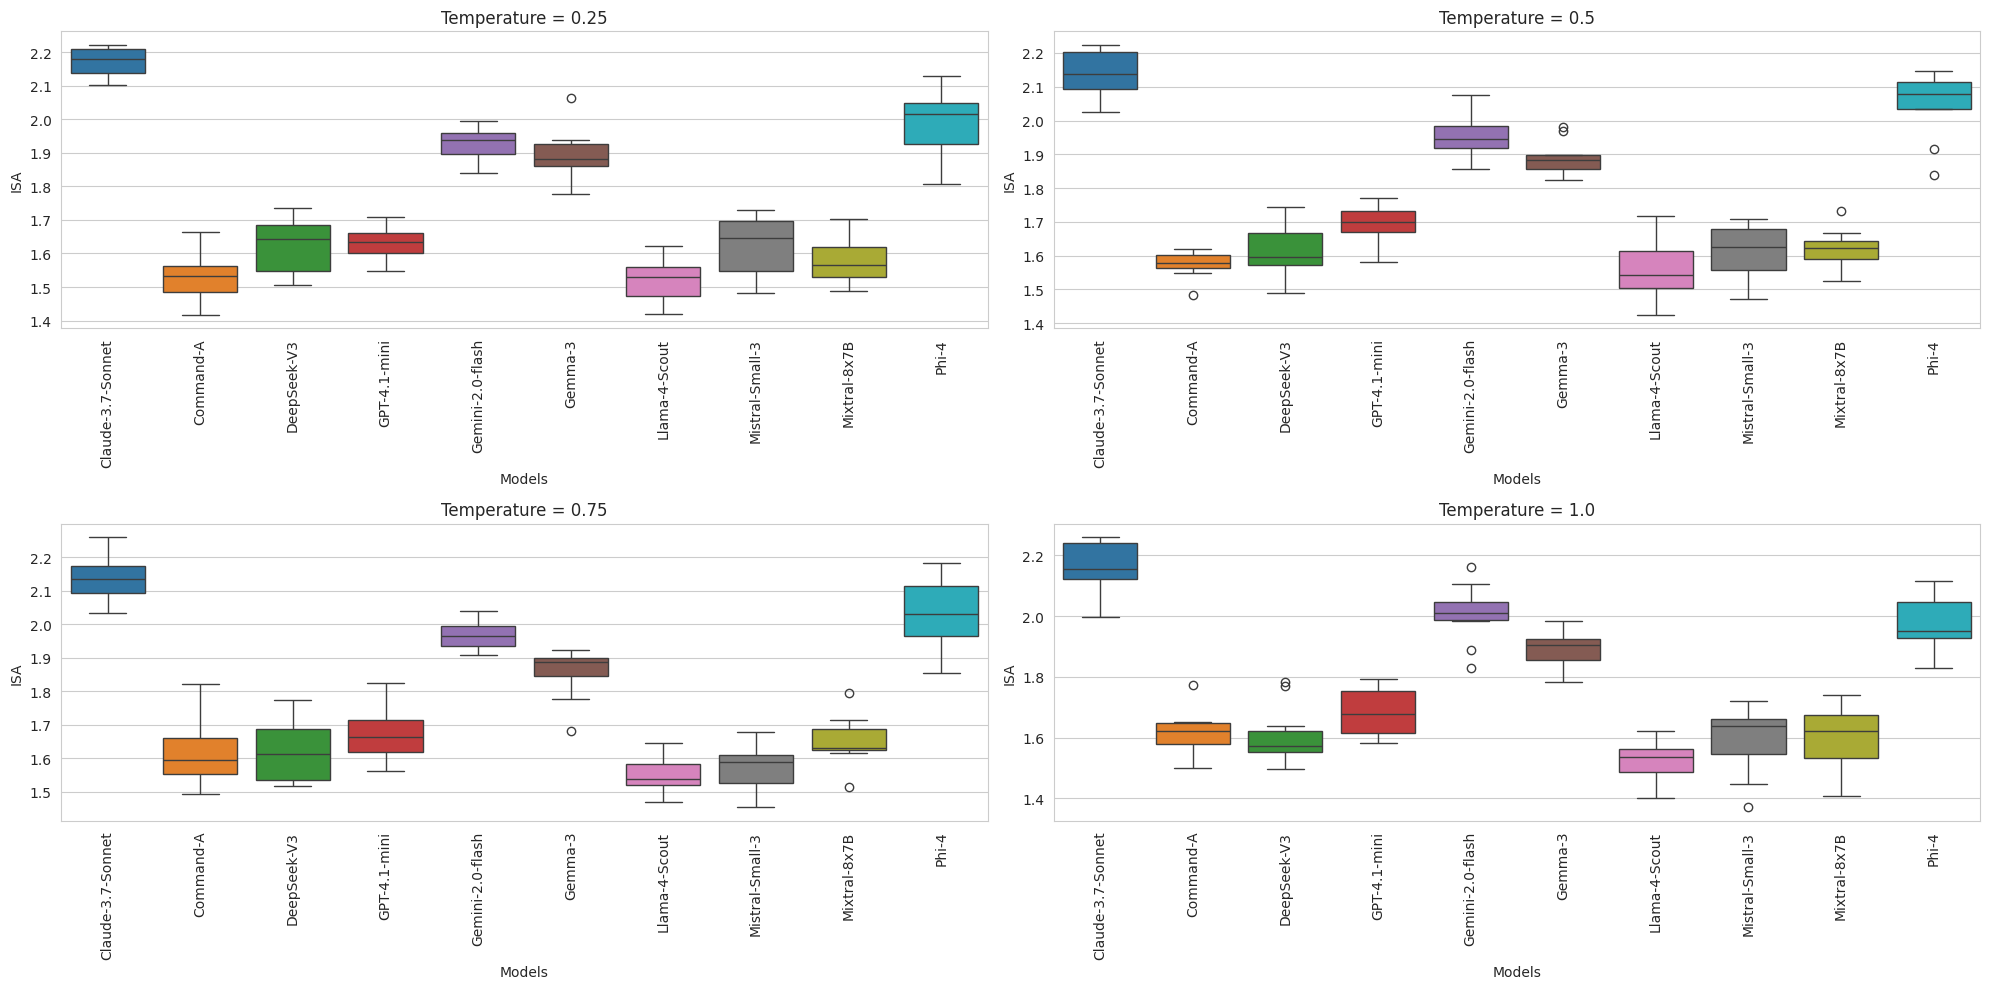

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

temps_list = [0.25, 0.5, 0.75, 1.0]
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()  # Convert 2x2 to a 1D array

for i, temp in enumerate(temps_list):
    temp_grades = {}
    for tagged_model in tagged_models:
        for name in grades_dfs:
            if f'{tagged_model} Answers in temp={temp}' in grades_dfs[name].index:
                temp_grades.setdefault(tagged_model, []).append(grades_dfs[name][f'{tagged_model} Answers in temp={temp}'])
    sns.boxplot(data=pd.DataFrame(temp_grades), ax=axes[i], palette=[color_map[model] for model in pd.DataFrame(temp_grades).columns])
    axes[i].set_title(f"Temperature = {temp}")
    axes[i].set_xlabel("Models")
    axes[i].set_ylabel("ISA")
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)

plt.tight_layout()
plt.show()


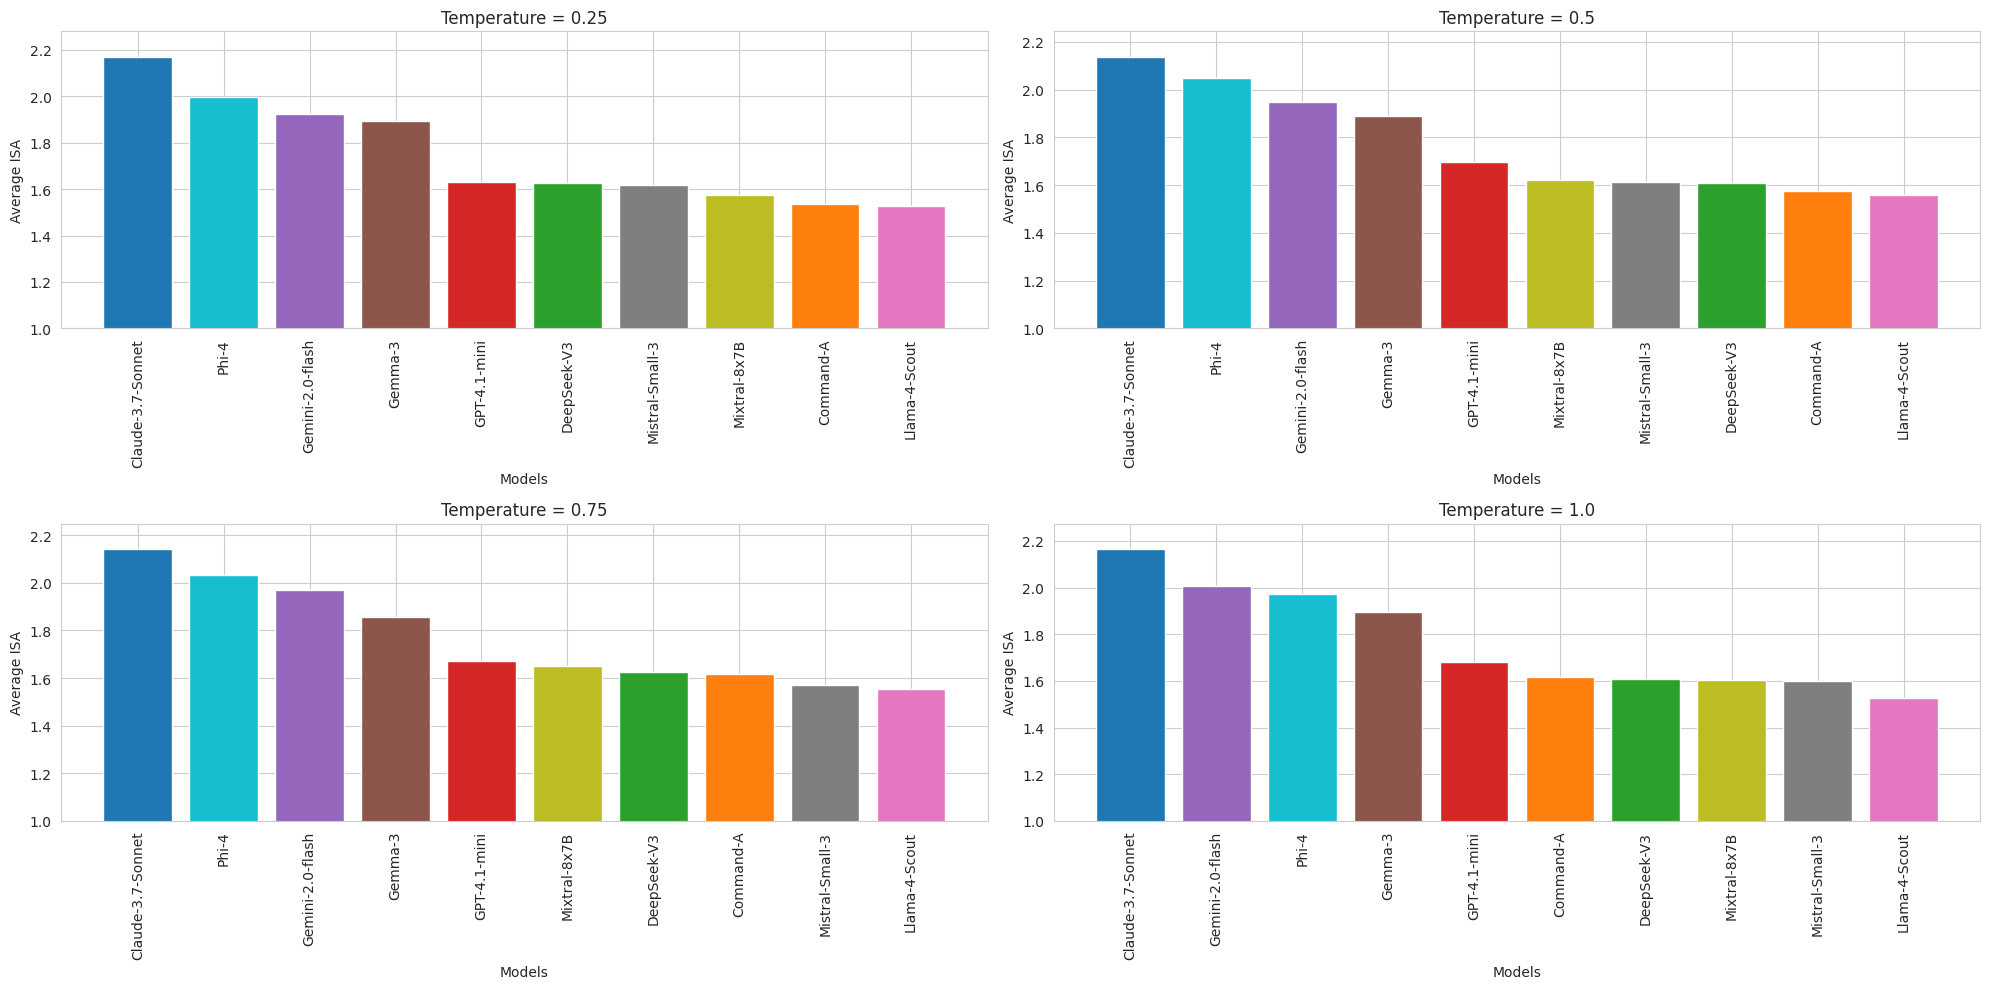

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define temperatures and figure
temps_list = [0.25, 0.5, 0.75, 1.0]
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()

# Loop through temperatures and plot
for i, temp in enumerate(temps_list):
    temp_grades = {}
    for tagged_model in tagged_models:
        for name in grades_dfs:
            if f'{tagged_model} Answers in temp={temp}' in grades_dfs[name].index:
                temp_grades.setdefault(tagged_model, []).append(grades_dfs[name][f'{tagged_model} Answers in temp={temp}'])

    # Sort models by average grade
    sorted_temp_grades = sorted(temp_grades.items(), key=lambda item: sum(item[1]) / len(item[1]), reverse=True)

    # Model names and average grades
    model_names = [k for k, v in sorted_temp_grades]
    avg_grades = [sum(v) / len(v) for k, v in sorted_temp_grades]

    # Plot bar chart with consistent colors
    ax = axes[i]
    ax.bar(model_names, avg_grades, color=[color_map[model] for model in model_names])
    ax.set_title(f"Temperature = {temp}")
    ax.set_xlabel("Models")
    ax.set_ylabel("Average ISA")
    ax.set_ylim(1.0, None)  # Set y-axis to start from 1.0
    ax.tick_params(axis='x', rotation=90, labelsize=10)

plt.tight_layout()
plt.show()


In [ ]:
grades_temp0.index

RangeIndex(start=0, stop=10, step=1)

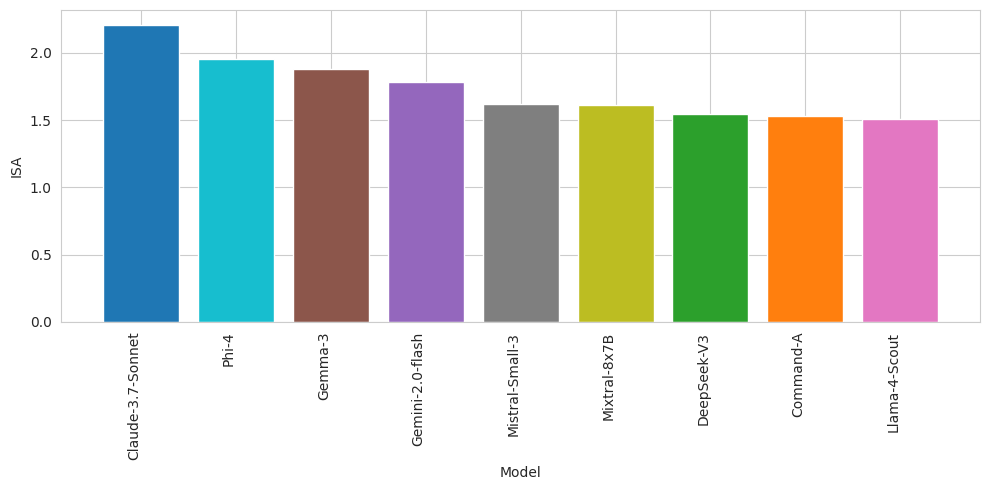

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd

# read the “Model” column in as the index, and pull out the “Default” series
grades_temp0 = pd.read_excel(
    '/content/10_models_average_scores_v2.xlsx',
    header=0,       # first row is header
    index_col=0     # first column (“Model”) becomes the index
)['Default']

# Now grades_temp0.index are your model names, not integers.


# 1) get a Series of values, sorted descending (dropping the first element)
if isinstance(grades_temp0, pd.DataFrame):
    series0 = grades_temp0.iloc[:, 0]
else:
    series0 = grades_temp0

# drop the first row if that’s what you intended, then sort
sorted_s = series0.iloc[1:].sort_values(ascending=False)

# 2) build clean model names
models = [idx.split()[0] for idx in sorted_s.index]

# 3) map colors
colors = [color_map.get(m, "#333333") for m in models]  # fallback color

# 4) plot
plt.figure(figsize=(10, 5))
plt.bar(models, sorted_s.values, color=colors)
plt.xlabel("Model")
plt.ylabel("ISA")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()
